In [11]:
import pandas as pd
import numpy as np
import xgboost

In [12]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [13]:
data = pd.read_csv('E:/git_exercise/Machine learning/winequality-red.csv', sep = ';')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [15]:
### Ваш код ###
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis=1), data['quality'], test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 925             8.6             0.220         0.36             1.9      0.064   
 363            12.5             0.460         0.63             2.0      0.071   
 906             7.2             0.540         0.27             2.6      0.084   
 426             6.4             0.670         0.08             2.1      0.045   
 1251            7.5             0.580         0.14             2.2      0.077   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [17]:
### Ваш код ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение классификаторов
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

bc = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
bc.fit(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Оценка точности на тестовой выборке
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
bc_acc = accuracy_score(y_test, bc.predict(X_test))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

# Сравнение результатов
print("Точность DecisionTreeClassifier:", dtc_acc)
print("Точность BaggingClassifier:", bc_acc)
print("Точность RandomForestClassifier:", rfc_acc)


Точность DecisionTreeClassifier: 0.5729166666666666
Точность BaggingClassifier: 0.6416666666666667
Точность RandomForestClassifier: 0.6541666666666667


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



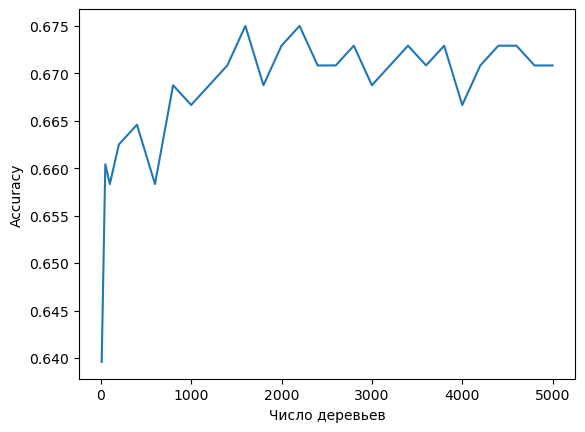

In [20]:
### Ваш код ###
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создаем случайную выборку данных
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=0)

# Разделяем данные на обучающую и тестовую выборки
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создаем экземпляр классификатора RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

# Создаем список значений деревьев
n_trees = [10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000]

# Создаем список значений accuracy
accuracy = []

# Обучаем классификатор и оцениваем его качество на тестовой выборке для каждого значения деревьев
for n in n_trees:
    clf.n_estimators = n
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Строим график зависимости качества от числа деревьев
import matplotlib.pyplot as plt
plt.plot(n_trees, accuracy)
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.show()


4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [28]:


### Ваш код ###

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Загрузка данных
#cancer = load_breast_cancer()
#X = cancer.data
#y = cancer.target

# Разделение данных на обучающую и тестовую выборки
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
# Обучение модели с использованием sklearn
sklearn_model = GradientBoostingClassifier()
sklearn_model.fit(X_train, y_train)

# Обучение модели с использованием xgboost
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Вычисление метрики accuracy с использованием кросс-валидации
sklearn_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5, scoring='accuracy')
xgboost_scores = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring='accuracy')

# Вывод результатов
print("Средний accuracy для sklearn:", sklearn_scores.mean())
print("Средний accuracy для xgboost:", xgboost_scores.mean())


Средний accuracy для sklearn: 0.9494505494505494
Средний accuracy для xgboost: 0.9626373626373628


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [19]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Читаем csv файл
#df = pd.read_csv('data.csv')

# Создаем объекты для моделей sklearn и xgboost
sklearn_model = RandomForestClassifier()
xgboost_model = XGBClassifier()

# Определяем параметры для оптимизации
param_grid_sklearn = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6]
}

param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.05, 0.1]
}

le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Запускаем GridSearchCV для каждой модели
sklearn_grid_search = GridSearchCV(sklearn_model, param_grid_sklearn, cv=3)
xgboost_grid_search = GridSearchCV(xgboost_model, param_grid_xgboost, cv=3)

# Обучаем модели
sklearn_grid_search.fit(X_train, y_train)
xgboost_grid_search.fit(X_train, y_train)

# Выводим результаты оптимизации
print('Лучшие параметры для модели sklearn:', sklearn_grid_search.best_params_)
print('Лучшие параметры для модели xgboost:', xgboost_grid_search.best_params_)

# Сравниваем значения метрики accuracy
print('Значение метрики accuracy для модели sklearn:', sklearn_grid_search.best_score_)
print('Значение метрики accuracy для модели xgboost:', xgboost_grid_search.best_score_)

Лучшие параметры для модели sklearn: {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 200}
Лучшие параметры для модели xgboost: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}
Значение метрики accuracy для модели sklearn: 0.6371760500446828
Значение метрики accuracy для модели xgboost: 0.6389633601429848


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [22]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Обучение моделей
model_lgbm = LGBMClassifier(n_estimators=100)
model_cat = CatBoostClassifier(n_estimators=100)
model_xgb = XGBClassifier(n_estimators=100)
model_gbc = GradientBoostingClassifier(n_estimators=100)

# Оценка моделей
scores_lgbm = cross_val_score(model_lgbm, X_train, y_train, cv=5, scoring='accuracy')
scores_cat = cross_val_score(model_cat, X_train, y_train, cv=5, scoring='accuracy')
scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')
scores_gbc = cross_val_score(model_gbc, X_train, y_train, cv=5, scoring='accuracy')

# Вывод результатов
print('LGBMClassifier:', scores_lgbm.mean())
print('CatBoostClassifier:', scores_cat.mean())
print('XGBClassifier:', scores_xgb.mean())
print('GradientBoostingClassifier:', scores_gbc.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [23]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Параметры для поиска
params_lgbm = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1]}
params_cat = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1]}
params_xgb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1]}
params_gbc = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1]}

# Создание моделей с параметрами для поиска
model_lgbm = GridSearchCV(LGBMClassifier(), params_lgbm, cv=5, scoring='accuracy')
model_cat = GridSearchCV(CatBoostClassifier(), params_cat, cv=5, scoring='accuracy')
model_xgb = GridSearchCV(XGBClassifier(), params_xgb, cv=5, scoring='accuracy')
model_gbc = GridSearchCV(GradientBoostingClassifier(), params_gbc, cv=5, scoring='accuracy')

# Обучение моделей
model_lgbm.fit(X_train, y_train)
model_cat.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_gbc.fit(X_train, y_train)

# Вывод результатов
print('Лучшие параметры для LGBMClassifier:', model_lgbm.best_params_)
print('Лучшие параметры для CatBoostClassifier:', model_cat.best_params_)
print('Лучшие параметры для XGBClassifier:', model_xgb.best_params_)
print('Лучшие параметры для GradientBoostingClassifier:', model_gbc.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [25]:
import optuna
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Создание функции оценки качества модели
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 10)
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Создание оптимизатора
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Поиск по сетке из sklearn
params_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(XGBClassifier(), params_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print('Лучшие параметры, найденные optuna:')
for param_name in sorted(study.best_params.keys()):
    print('\t{}: {}'.format(param_name, study.best_params[param_name]))

print('Лучшие параметры, найденные поиском по сетке из sklearn:')
for param_name in sorted(grid_search.best_params_.keys()):
    print('\t{}: {}'.format(param_name, grid_search.best_params_[param_name]))


[I 2024-02-24 19:42:21,148] A new study created in memory with name: no-name-ce356041-cec9-45bc-a95b-135231fbccc1
[I 2024-02-24 19:42:22,855] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.4794742735511823, 'n_estimators': 333, 'max_depth': 2}. Best is trial 0 with value: 0.0.
[I 2024-02-24 19:42:31,485] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.029374002331898096, 'n_estimators': 924, 'max_depth': 4}. Best is trial 0 with value: 0.0.
[I 2024-02-24 19:42:35,818] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.4768456010662959, 'n_estimators': 863, 'max_depth': 2}. Best is trial 0 with value: 0.0.
[I 2024-02-24 19:42:38,014] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.19012217486658153, 'n_estimators': 226, 'max_depth': 7}. Best is trial 0 with value: 0.0.
[I 2024-02-24 19:42:40,514] Trial 4 finished with value: 0.0 and parameters: {'learning_rate': 0.18827764752870327, 'n_estimators': 272, 'm

Лучшие параметры, найденные optuna:
	learning_rate: 0.4794742735511823
	max_depth: 2
	n_estimators: 333
Лучшие параметры, найденные поиском по сетке из sklearn:
	learning_rate: 0.05
	max_depth: 6
	n_estimators: 200


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создаем объекты для алгоритмов градиентного бустинга
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
cat = CatBoostClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

# Создаем объект StackingClassifier
stacker = StackingClassifier(estimators=[('lgbm', lgbm), ('xgb', xgb), ('cat', cat),('rfc',rfc)], final_estimator=LogisticRegression())

# Обучаем модель
stacker.fit(X_train, y_train)

# Оцениваем качество модели
print(f"Accuracy score: {accuracy_score(y_test, stacker.predict(X_test))}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 1119, number of used features: 11
[LightGBM] [Info] Start training from score -4.822966
[LightGBM] [Info] Start training from score -3.436672
[LightGBM] [Info] Start training from score -0.833982
[LightGBM] [Info] Start training from score -0.937972
[LightGBM] [Info] Start training from score -2.092937
[LightGBM] [Info] Start training from score -4.535284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [28]:
from sklearn.model_selection import GridSearchCV

# Создаем объекты для алгоритмов градиентного бустинга
lgbm = LGBMClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
rfc = RandomForestClassifier()

# Определяем параметры для поиска
params_lgbm = {'n_estimators': range(100, 200, 50), 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': range(1, 4)}
params_xgb = {'n_estimators': range(100, 200, 50), 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': range(1, 4)}
params_cat = {'n_estimators': range(100, 200, 50), 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': range(1, 4)}
params_rfc = {'n_estimators': range(100, 200, 50), 'max_depth': range(3, 10)}

# Создаем объекты GridSearchCV для каждого алгоритма
lgbm_grid = GridSearchCV(lgbm, params_lgbm, cv=5, scoring='accuracy')
xgb_grid = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy')
cat_grid = GridSearchCV(cat, params_cat, cv=5, scoring='accuracy')
rfc_grid = GridSearchCV(rfc, params_rfc, cv=5, scoring='accuracy')

# Обучаем модели с использованием GridSearchCV
lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)
rfc_grid.fit(X_train, y_train)

# Получаем оптимизированные объекты
optimized_lgbm = lgbm_grid.best_estimator_
optimized_xgb = xgb_grid.best_estimator_
optimized_cat = cat_grid.best_estimator_
optimized_rfc = rfc_grid.best_estimator_

# Создаем объект StackingClassifier с оптимизированными объектами
stacker = StackingClassifier(estimators=[('lgbm', optimized_lgbm), ('xgb', optimized_xgb), ('cat', optimized_cat),('rfc', optimized_rfc)], final_estimator=LogisticRegression())

# Обучаем модель
stacker.fit(X_train, y_train)

# Оцениваем качество модели
print(f"Accuracy score: {accuracy_score(y_test, stacker.predict(X_test))}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data po